In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW 

In [25]:
gfPropDf.head() 

,topic,mean,CI_left,CI_right,date
0,hasFloyd,0.053935,0.024622,0.083248,2020-05-25
1,hasFloyd,0.099313,0.071519,0.127107,2020-05-26
2,hasFloyd,0.937826,0.854837,1.020815,2020-05-27
3,hasFloyd,2.813299,2.670097,2.956502,2020-05-28
4,hasFloyd,5.256865,5.058258,5.455472,2020-05-29


(0.0, 20.0)

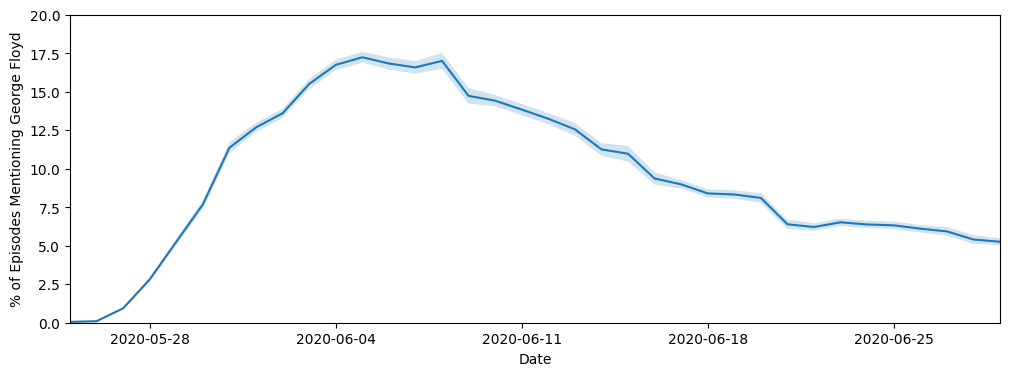

In [33]:
gfPropDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfProp.jsonl", orient="records", lines=True)

#we need to add the confidence bands
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)
ax.fill_between(gfPropDf["date"], gfPropDf["CI_left"], gfPropDf["CI_right"], alpha=.2) 

#plot the actual lines 
sns.lineplot(gfPropDf, x="date", y="mean" )


ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlabel("Date")
ax.set_ylabel("% of Episodes Mentioning George Floyd")
ax.set_xlim(pd.Timestamp("2020-05-25"), pd.Timestamp("2020-06-29"))
ax.set_ylim(0, 20)

(18407.0, 18442.0)

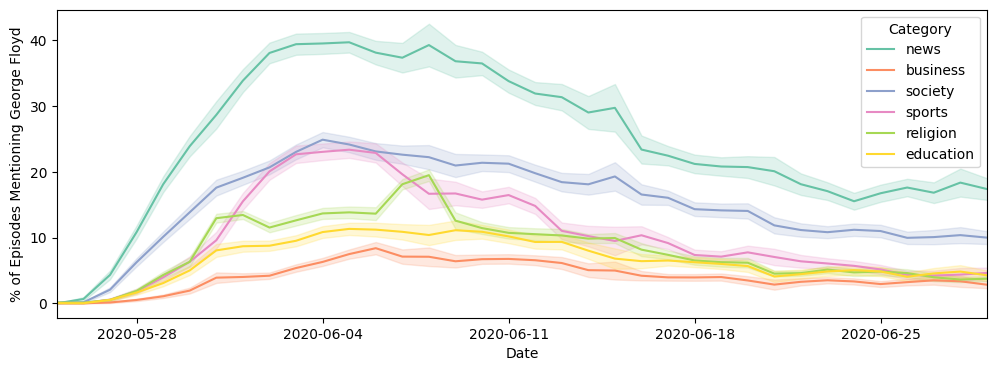

In [28]:
cats = ["news", "business", "society", "sports", "religion", "education"]
gfPropCatsDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfPropCategories.jsonl", orient="records", lines=True)
palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)


#we need to add the confidence bands
for i, topic in enumerate(cats): 
    currData = gfPropCatsDf[gfPropCatsDf["Category"] == topic]
    ax.fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(gfPropCatsDf, x="date", y="mean", hue="Category", hue_order=cats, palette=palette)


#ax.axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)
#ax.axhline(9.2, color="grey", linestyle="--")


#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))

ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlabel("Date")
ax.set_ylabel("% of Episodes Mentioning George Floyd")
ax.set_xlim(pd.Timestamp("2020-05-25"), pd.Timestamp("2020-06-29"))

#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")

(0.0, 20.0)

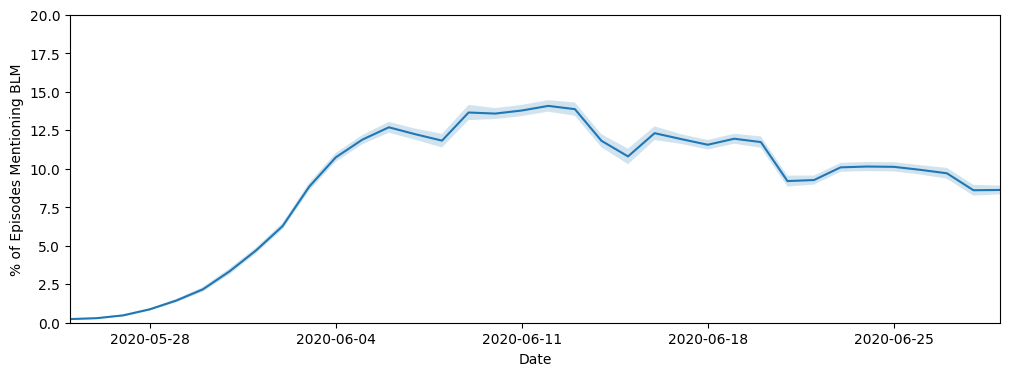

In [32]:
BLMPropDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/BLMProp.jsonl", orient="records", lines=True)

#we need to add the confidence bands
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)
ax.fill_between(BLMPropDf["date"], BLMPropDf["CI_left"], BLMPropDf["CI_right"], alpha=.2) 

#plot the actual lines 
sns.lineplot(BLMPropDf, x="date", y="mean" )


ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlabel("Date")
ax.set_ylabel("% of Episodes Mentioning BLM")
ax.set_xlim(pd.Timestamp("2020-05-25"), pd.Timestamp("2020-06-29"))
ax.set_ylim(0, 20)

(18407.0, 18442.0)

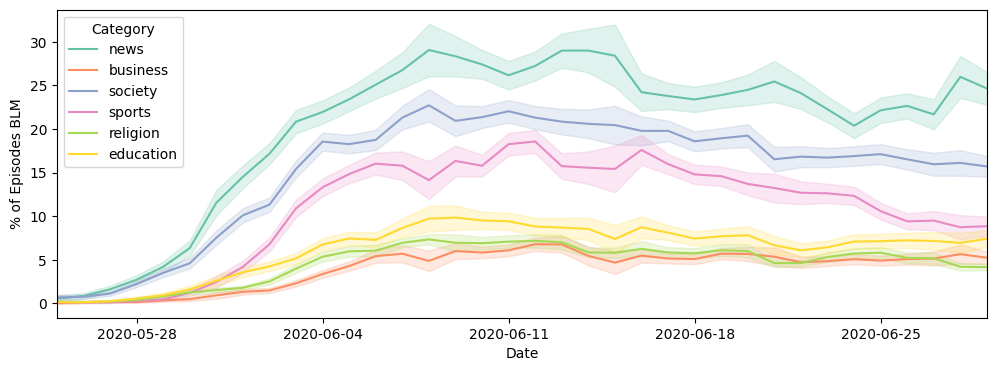

In [31]:
BLMPropCatsDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/BLMPropCategories.jsonl", orient="records", lines=True)
palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)


#we need to add the confidence bands
for i, topic in enumerate(cats): 
    currData = BLMPropCatsDf[BLMPropCatsDf["Category"] == topic]
    ax.fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(BLMPropCatsDf, x="date", y="mean", hue="Category", hue_order=cats, palette=palette)

#ax.axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)
#ax.axhline(9.2, color="grey", linestyle="--")


#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlabel("Date")
ax.set_ylabel("% of Episodes BLM")
ax.set_xlim(pd.Timestamp("2020-05-25"), pd.Timestamp("2020-06-29"))

#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")

/tmp/ipykernel_1522432/108477297.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])
/tmp/ipykernel_1522432/108477297.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([topicLabelMapping[topic] for topic in topicsOrder])


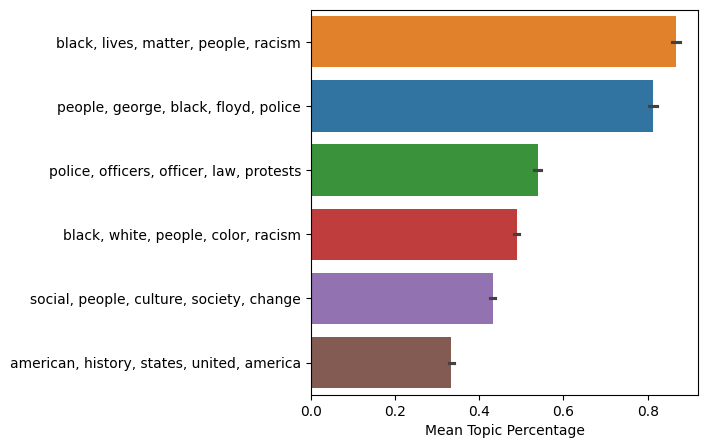

In [167]:
meltedTopics = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryPropData.csv")
#write data so we can just modify figure as we need to 
#meltedTopics.to_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryPropData.csv")

fig, ax = plt.subplots(figsize=(5, 5))

topics = [13, 57, 159, 164, 69, 5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicLabels = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]
labelColorMapping = dict(zip(topicLabels, colors))
topicColorMapping = dict(zip(topics,colors))
topicLabelMapping = dict(zip(topics, topicLabels))

meltedTopics["value"] *= 100

#topics = [13, 57, 159, 164, 69, 5]
topicsOrder = [57, 13, 159, 164, 69, 5]
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1f77b4','#8c564b']
sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])

ax.set_yticklabels([topicLabelMapping[topic] for topic in topicsOrder])

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=topicColorMapping[topic], markersize=10) for topic in topicsOrder]

ax.set_xlabel("Mean Topic Percentage")
ax.set_ylabel("")
#ax.set_title("Racial Justice Topic Proportions")

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/catPropsAfterFloyd.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/catPropsAfterFloyd.png", bbox_inches="tight", dpi=800) 

In [42]:
rollingDf

,Unnamed: 0,topic,mean,CI_left,CI_right,date,category
0,0,5,0.003717,0.002883,0.004552,2020-05-01,news
1,1,13,0.001241,0.000886,0.001596,2020-05-01,news
2,2,57,0.001492,0.001077,0.001908,2020-05-01,news
3,3,69,0.006682,0.005344,0.008020,2020-05-01,news
4,4,159,0.003908,0.003048,0.004769,2020-05-01,news
...,...,...,...,...,...,...,...
2191,361,13,0.002640,0.001707,0.003574,2020-06-30,education
2192,362,57,0.005681,0.004376,0.006986,2020-06-30,education
2193,363,69,0.006028,0.004899,0.007156,2020-06-30,education
2194,364,159,0.002257,0.001414,0.003100,2020-06-30,education


/tmp/ipykernel_1522432/2560936547.py:30: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette)
/tmp/ipykernel_1522432/2560936547.py:55: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(legend_elements, labels=topicList, loc="upper left")


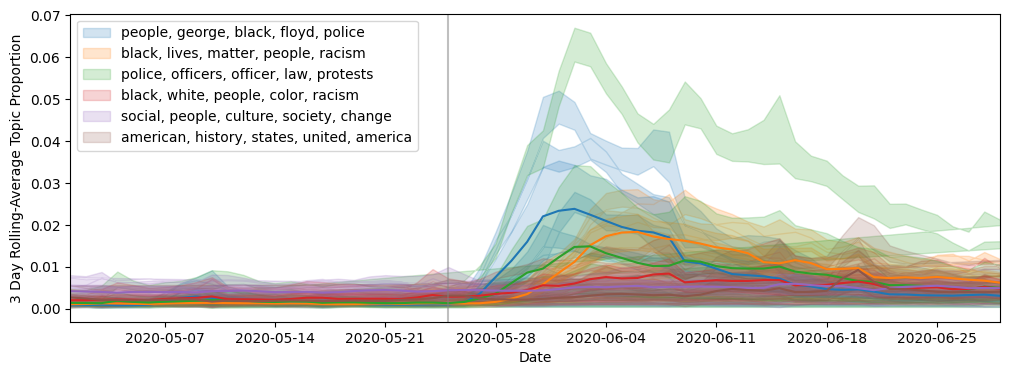

In [162]:

tab10 = ["#1f77b4", 
"#ff7f0e", 
"#2ca02c", 
"#d62728", 
"#9467bd", 
"#8c564b", 
"#e377c2", 
"#7f7f7f", 
"#bcbd22", 
"#17becf"]

#output rolling df so we can reproduce the figure 
rollingDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryTimeSeriesData.csv")
rollingDf["date"] = pd.to_datetime(rollingDf["date"])

#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
palette=tab10
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)


#we need to add the confidence bands
for i, topic in enumerate(topics): 
    currData = rollingDf[rollingDf["topic"] == topic]
    ax.fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette)


ax.axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

#what do these cols mean? 
'''
13 - general george floyd 
57 - BLM 
159 - focus is more on policing and minneapolis 
164 - more about racism as a concept 
69 - more general society and culture 
5- American History 
'''

# Define the colors and labels for the legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))
ax.legend(legend_elements, labels=topicList, loc="upper left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_xlabel("Date")
ax.set_ylabel("3 Day Rolling-Average Topic Proportion")
ax.set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")


#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/OverallTimeSeries.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/OverallTimeSeries.png", bbox_inches="tight", dpi=800) 

In [163]:
rollingDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryTimeSeriesData.csv")

In [164]:
rollingDf[rollingDf["category"] == "sports"]

,Unnamed: 0,topic,mean,CI_left,CI_right,date,category
366,0,5,0.001276,0.000866,0.001686,2020-05-01,sports
367,1,13,0.000623,0.000435,0.000812,2020-05-01,sports
368,2,57,0.000474,0.000358,0.000591,2020-05-01,sports
369,3,69,0.000820,0.000505,0.001135,2020-05-01,sports
370,4,159,0.000689,0.000435,0.000943,2020-05-01,sports
...,...,...,...,...,...,...,...
727,361,13,0.001659,0.001173,0.002144,2020-06-30,sports
728,362,57,0.004239,0.003142,0.005336,2020-06-30,sports
729,363,69,0.000990,0.000596,0.001385,2020-06-30,sports
730,364,159,0.000661,0.000420,0.000902,2020-06-30,sports


/tmp/ipykernel_1522432/3124322918.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollingDf["CI_left"] *= 100
/tmp/ipykernel_1522432/3124322918.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollingDf["CI_right"] *= 100
/tmp/ipykernel_1522432/3124322918.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

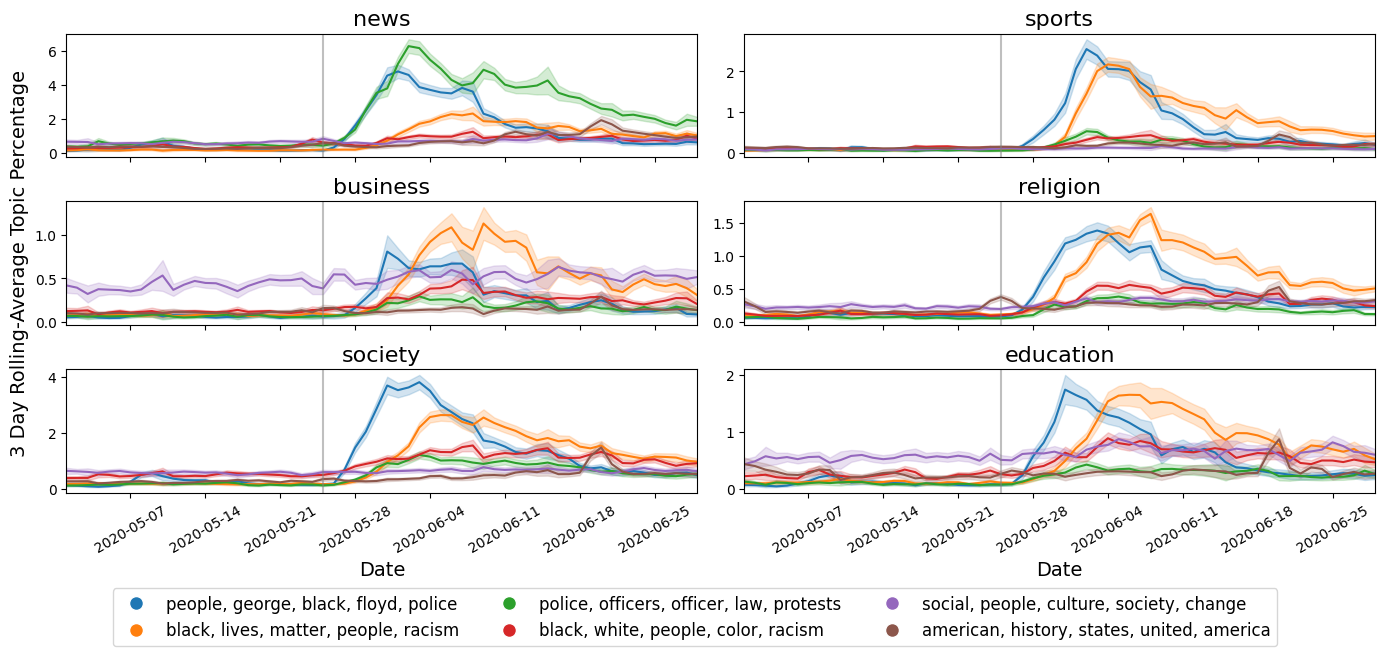

In [165]:
inDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryTimeSeriesData.csv")
inDf["date"] = pd.to_datetime(inDf["date"])

catList = ["news", "sports", "business", "religion", "society", "education"]

#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#ok now remake figure with different topics 
ROWS = 3
COLS = 2 
fig, axs = plt.subplots(ROWS, COLS, figsize=(14, 6), sharex=True)
counter = 0 
for row in range(ROWS): 
    for col in range(COLS): 
        currCat = catList[counter]
        rollingDf = inDf[inDf["category"] == currCat]

        rollingDf["CI_left"] *= 100
        rollingDf["CI_right"] *= 100
        rollingDf["mean"] *= 100
        
        #we need to add the confidence bands
        for i, topic in enumerate(topics): 
            currData = rollingDf[rollingDf["topic"] == topic]
            axs[row, col].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

        #plot the actual lines 
        sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=axs[row, col])


        axs[row, col].axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

         
        axs[row, col].get_legend().remove()

        axs[row, col].xaxis.set_major_locator(ticker.MultipleLocator(7))
        axs[row, col].set_xlabel("Date", size=14)

        if row == 1 and col == 0: 
            axs[row, col].set_ylabel("3 Day Rolling-Average Topic Percentage", size=14)
        else: 
            axs[row, col].set_ylabel("")

        axs[row, col].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
        axs[row, col].tick_params(axis='x', labelrotation=30) 
        axs[row,col].set_title(currCat, size=16)
        counter += 1

# Define the colors and labels for the legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

# Add a single legend underneath the entire figure
fig.legend(legend_elements, topicList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()

#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryTimeSeries.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryTimeSeries.png", bbox_inches="tight", dpi=800) 

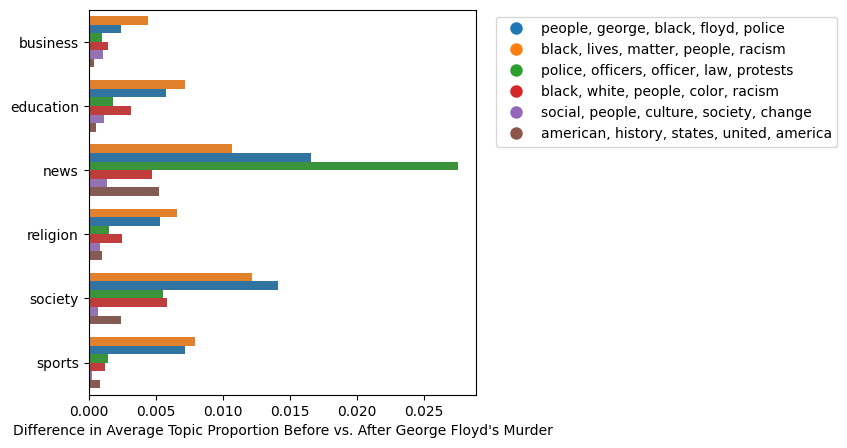

In [39]:
#write data for reproducibility 
topicDiffs = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/floydCategoryTopicDiffs.csv")

fig, ax = plt.subplots(figsize=(5, 5))


topics = [13, 57, 159, 164, 69, 5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicLabels = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]
labelColorMapping = dict(zip(topicLabels, colors))
topicColorMapping = dict(zip(topics,colors))
topicLabelMapping = dict(zip(topics, topicLabels))

topicsOrder = [57, 13, 159, 164, 69, 5]
#sns.barplot(meltedTopics, x="value", y = "variable", orient="h", estimator="mean", order=topicsOrder, ax=ax, palette=[topicColorMapping[topic] for topic in topicsOrder])

sns.barplot(topicDiffs, x="topicDiff", y="category1", hue="variable", hue_order = topicsOrder, palette=[topicColorMapping[topic] for topic in topicsOrder], ax=ax)
ax.set_ylabel("") 
ax.set_xlabel("Difference in Average Topic Proportion Before vs. After George Floyd's Murder")

#for the legend 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

# Add a single legend underneath the entire figure
ax.legend(legend_elements, topicList, loc='upper right', ncol=1, fontsize='medium', bbox_to_anchor=(1.95, 1))

#ax.set_title("Guest Network: Color by Category, Shape by Mention of George Floyd")
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryDiffs.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/categoryDiffs.png", bbox_inches="tight", dpi=800) 

In [40]:
#try and merge things into a single figure 
#what about news and business on the right side and then out two time series' on the left 


In [62]:
rollingDf

,Unnamed: 0,topic,mean,CI_left,CI_right,date,category
732,0,5,0.001006,0.000779,0.001234,NaT,business
733,1,13,0.000531,0.000391,0.000672,NaT,business
734,2,57,0.000717,0.000559,0.000875,NaT,business
735,3,69,0.004204,0.003354,0.005054,NaT,business
736,4,159,0.000688,0.000486,0.000891,NaT,business
...,...,...,...,...,...,...,...
1093,361,13,0.000863,0.000588,0.001138,NaT,business
1094,362,57,0.003153,0.002353,0.003952,NaT,business
1095,363,69,0.005201,0.004311,0.006092,NaT,business
1096,364,159,0.001238,0.000795,0.001682,NaT,business


In [63]:
inDf

,Unnamed: 0,topic,mean,CI_left,CI_right,date,category
0,0,5,0.003717,0.002883,0.004552,2020-04-30 12:00:00,news
1,1,13,0.001241,0.000886,0.001596,2020-04-30 12:00:00,news
2,2,57,0.001492,0.001077,0.001908,2020-04-30 12:00:00,news
3,3,69,0.006682,0.005344,0.008020,2020-04-30 12:00:00,news
4,4,159,0.003908,0.003048,0.004769,2020-04-30 12:00:00,news
...,...,...,...,...,...,...,...
2191,361,13,0.002640,0.001707,0.003574,NaT,education
2192,362,57,0.005681,0.004376,0.006986,NaT,education
2193,363,69,0.006028,0.004899,0.007156,NaT,education
2194,364,159,0.002257,0.001414,0.003100,NaT,education


/tmp/ipykernel_1522432/286199899.py:21: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[0,0])
/tmp/ipykernel_1522432/286199899.py:84: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[row, col])
/tmp/ipykernel_1522432/286199899.py:84: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[row, col])


news
business


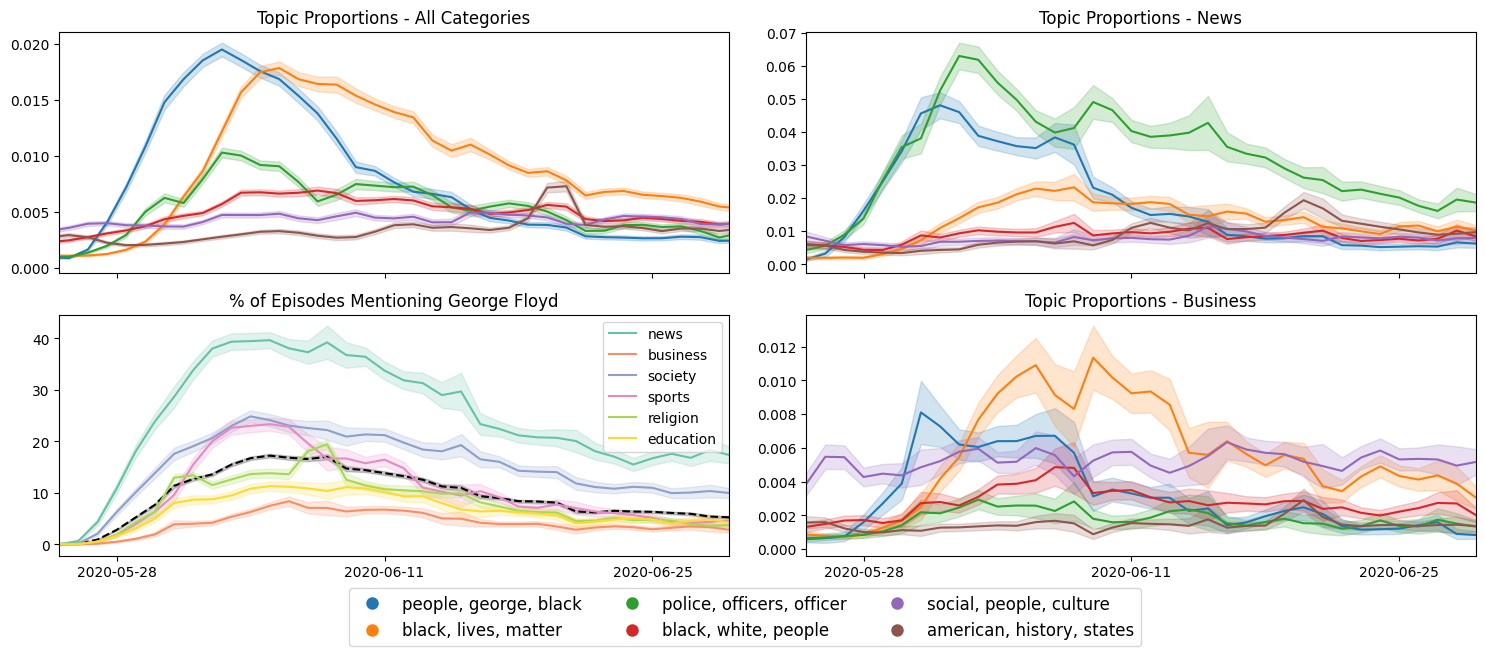

In [89]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6), sharex=True)

#FIRST SUBPLOT
#output rolling df so we can reproduce the figure 
rollingDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/topicTimeSeriesData.csv")
rollingDf["date"] = pd.to_datetime(rollingDf["date"])

#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
palette=tab10


#we need to add the confidence bands
for i, topic in enumerate(topics): 
    currData = rollingDf[rollingDf["topic"] == topic]
    ax[0,0].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[0,0])

ax[0,0].set_xlim(pd.Timestamp("2020-05-25"), pd.Timestamp("2020-06-29"))

ax[0, 0].axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

#what do these cols mean? 
'''
13 - general george floyd 
57 - BLM 
159 - focus is more on policing and minneapolis 
164 - more about racism as a concept 
69 - more general society and culture 
5- American History 
'''

# Define the colors and labels for the legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))
#ax[0,0].legend(legend_elements, labels=topicList, loc="upper left")
ax[0, 0].get_legend().remove()
#ax[0,0].set_xlabel("Date")
#ax[0,0].set_ylabel("3 Day Rolling-Average Topic Proportion")
ax[0,0].set_ylabel(None)

ax[0,0].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
ax[0,0].xaxis.set_major_locator(ticker.MultipleLocator(14))
ax[0,0].set_title("Topic Proportions - All Categories")
#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")

inDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/categoryTimeSeriesData.csv")
inDf["date"] = pd.to_datetime(inDf["date"])

#catList = ["news", "sports", "business", "religion", "society", "education"]
catList = ["news", "business"]
#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#ok now remake figure with different topics 
ROWS = 2
COLS = 1 
counter = 0 
for row in range(ROWS): 
    for col in range(COLS): 
        #need to do this to shift over 1 column in the plot!
        col = col + 1 
        currCat = catList[counter]
        rollingDf = inDf[inDf["category"] == currCat]

        print(currCat)
        #we need to add the confidence bands
        for i, topic in enumerate(topics): 
            currData = rollingDf[rollingDf["topic"] == topic]
            ax[row, col].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

        #plot the actual lines 
        sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[row, col])

        ax[row, col].axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

        ax[row, col].get_legend().remove()

        ax[row, col].xaxis.set_major_locator(ticker.MultipleLocator(14))
        #ax[row, col].set_xlabel("Date", size=14)
        ax[row, col].set_xlabel(None)

        if row == 1 and col == 0: 
            #ax[row, col].set_ylabel("3 Day Rolling-Average Topic Proportion", size=14)
            ax[row, col].set_ylabel(None)
        else: 
            ax[row, col].set_ylabel(None)

        ax[row, col].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
        #ax[row, col].tick_params(axis='x', labelrotation=30) 
        ax[row,col].set_title(currCat, size=16)
        counter += 1

ax[0,1].set_title("Topic Proportions - News")
ax[1,1].set_title("Topic Proportions - Business")
ax[1,1].set_xlabel(None)
# Define the colors and labels for the legend
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
#topicList = ["people, george, black, floyd, police", "black, lives, matter, people, racism","police, officers, officer, law, protests", "black, white, people, color, racism","social, people, culture, society, change","american, history, states, united, america"]
topicList = ["people, george, black", "black, lives, matter","police, officers, officer", "black, white, people","social, people, culture","american, history, states"]

colorMapping = dict(zip(topicList, colors))

# Create custom legend elements with the specified colors and labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colorMapping[topic], markersize=10) for topic in topicList]

# Add a single legend underneath the entire figure
#bbox_to_anchor=(0.5, -0.1)
fig.legend(legend_elements, topicList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()

#now do the figure on the lower left!
gfPropDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfProp.jsonl", orient="records", lines=True)

#we need to add the confidence bands
ax[1,0].fill_between(gfPropDf["date"], gfPropDf["CI_left"], gfPropDf["CI_right"], alpha=.2, color="black") 

#plot the actual lines 
sns.lineplot(gfPropDf, x="date", y="mean", ax=ax[1,0], color="black", linestyle="--")


ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(14))
#ax[1,0].set_ylabel("% of Episodes Mentioning George Floyd")
ax[1,0].set_ylabel(None)
ax[1,0].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))


cats = ["news", "business", "society", "sports", "religion", "education"]
gfPropCatsDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfPropCategories.jsonl", orient="records", lines=True)
palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

#we need to add the confidence bands
for i, topic in enumerate(cats): 
    currData = gfPropCatsDf[gfPropCatsDf["Category"] == topic]
    ax[1,0].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(gfPropCatsDf, x="date", y="mean", hue="Category", hue_order=cats, palette=palette, ax=ax[1,0])


#ax.axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)
#ax.axhline(9.2, color="grey", linestyle="--")
#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))

ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(14))
ax[1,0].set_xlabel(None)
#ax[1,0].set_ylabel("% of Episodes Mentioning George Floyd")
ax[1,0].set_ylabel(None)
ax[1,0].set_xlim(pd.Timestamp("2020-05-25"), pd.Timestamp("2020-06-29"))
ax[1, 0].set_title("% of Episodes Mentioning George Floyd") 
ax[1,0].legend(loc="upper right")
#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")

plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/4panelFloydSummary.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/4panelFloydSummary.png", bbox_inches="tight", dpi=800) 

In [122]:
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

/tmp/ipykernel_1522432/484936226.py:25: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[0])


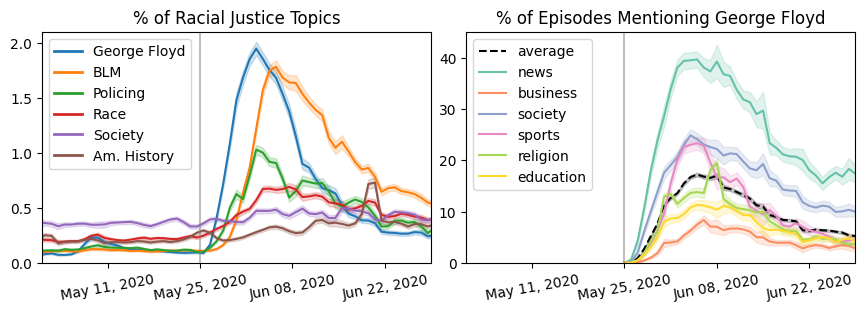

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 3), sharex=True)

#FIRST SUBPLOT
#output rolling df so we can reproduce the figure 
rollingDf = pd.read_csv("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/topicTimeSeriesData.csv")
rollingDf["date"] = pd.to_datetime(rollingDf["date"])

#topics in the ordering we want 
topics = [13, 57, 159, 164, 69, 5]

#palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
palette=tab10

# Multiply values by 100 to convert to percentages
rollingDf["mean"] *= 100
rollingDf["CI_left"] *= 100
rollingDf["CI_right"] *= 100

#we need to add the confidence bands
for i, topic in enumerate(topics): 
    currData = rollingDf[rollingDf["topic"] == topic]
    ax[0].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(rollingDf, x="date", y="mean", hue="topic", hue_order=topics, palette=palette, ax=ax[0])

# Manually set x-ticks to ensure one lands on May 25, 2020
tick_dates = pd.date_range(start="2020-05-11", end="2020-06-29", freq='14D')
ax[0].set_xticks(tick_dates)
#ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b %d, %Y"))
ax[0].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
ax[0].set_ylim(0, 2.1)
ax[0].axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis="x", labelrotation=10)
ax[0].set_title("% of Racial Justice Topics") 

#to get legend to match 
# Define custom line handles using the colors in the palette
line_styles = [Line2D([0], [0], color=palette[i], lw=2) for i in range(len(topics))]
'''
labels=[
    "people, george, floyd", 
    "black, lives, matter", 
    "police, officers, officer", 
    "black, white, people", 
    "social, people, culture", 
    "american, history, states"
],
'''
# Set the legend using these line handles on the left subplot
ax[0].legend(
    handles=line_styles,
    loc="upper left",
    fontsize=10, 
    labels=["George Floyd", "BLM", "Policing", "Race", "Society", "Am. History"]
)
#ax[0].legend(labels=["people, george, floyd", "black, lives, matter", "police, officers, officer", "black, white, people", "social, people, culture", "american, history, states"], loc="upper left", fontsize=10)
#now do the figure on the lower left!
gfPropDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfProp.jsonl", orient="records", lines=True)




#we need to add the confidence bands
ax[1].fill_between(gfPropDf["date"], gfPropDf["CI_left"], gfPropDf["CI_right"], alpha=.2, color="black") 

#plot the actual lines 
sns.lineplot(gfPropDf, x="date", y="mean", ax=ax[1], color="black", linestyle="--", label="average")


#ax[1].xaxis.set_major_locator(ticker.MultipleLocator(14))
#ax[1,0].set_ylabel("% of Episodes Mentioning George Floyd")


cats = ["news", "business", "society", "sports", "religion", "education"]
gfPropCatsDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfPropCategories.jsonl", orient="records", lines=True)
palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

#we need to add the confidence bands
for i, topic in enumerate(cats): 
    currData = gfPropCatsDf[gfPropCatsDf["Category"] == topic]
    ax[1].fill_between(currData["date"], currData["CI_left"], currData["CI_right"], color=palette[i], alpha=.2) 

#plot the actual lines 
sns.lineplot(gfPropCatsDf, x="date", y="mean", hue="Category", hue_order=cats, palette=palette, ax=ax[1])

#add vertical line 
ax[1].axvline(pd.to_datetime("2020-05-25"), color="grey", alpha=.5)

#ax.axhline(9.2, color="grey", linestyle="--")
#fig.legend(legend_elements, titleList, loc='lower center', ncol=3, fontsize='large', bbox_to_anchor=(0.5, -0.1))

tick_dates = pd.date_range(start="2020-05-11", end="2020-06-29", freq='14D')
# Manually set x-ticks to ensure one lands on May 25, 2020
ax[1].set_xticks(tick_dates)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b %d, %Y"))
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_xlim(pd.Timestamp("2020-05-01"), pd.Timestamp("2020-06-29"))
ax[1].set_ylim(0, 45)
ax[1].set_title("% of Episodes Mentioning George Floyd") 
ax[1].tick_params(axis="x", labelrotation=10)
ax[1].legend(loc="upper left")

#fig.suptitle("Temporal Evolution of Topics Relating to George Floyd and Racial Justice")
plt.subplots_adjust(wspace=.09)
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/2panelFloydSummary.pdf", bbox_inches="tight") 
plt.savefig("/shared/3/projects/benlitterer/podcastData/figures/FloydFigures/2panelFloydSummary.png", bbox_inches="tight", dpi=800) 

In [156]:
gfPropCatsDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/figureData/floydFigures/gfPropCategories.jsonl", orient="records", lines=True)

In [158]:
gfPropCatsDf[gfPropCatsDf["date"] == "2020-06-30"]

,topic,mean,CI_left,CI_right,date,Category
216,hasFloyd,16.939502,14.975750,18.903254,2020-06-30,news
217,hasFloyd,2.626050,2.039234,3.212867,2020-06-30,business
218,hasFloyd,9.900562,8.682491,11.118633,2020-06-30,society
219,hasFloyd,5.033186,4.024473,6.041898,2020-06-30,sports
220,hasFloyd,4.107383,3.469766,4.744999,2020-06-30,religion
221,hasFloyd,4.356740,3.450155,5.263325,2020-06-30,education
